In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/Khyati/Downloads/Real_Combine.csv")

In [5]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [151]:
df.shape

(1092, 9)

<AxesSubplot:>

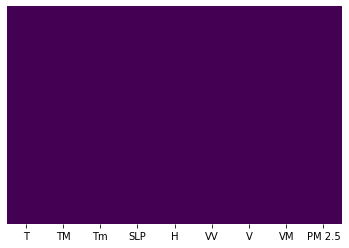

In [6]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df=df.dropna()

In [8]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [9]:
## check null values
X.isnull()
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1088    False
1089    False
1090    False
1091    False
1092    False
Name: PM 2.5, Length: 1092, dtype: bool

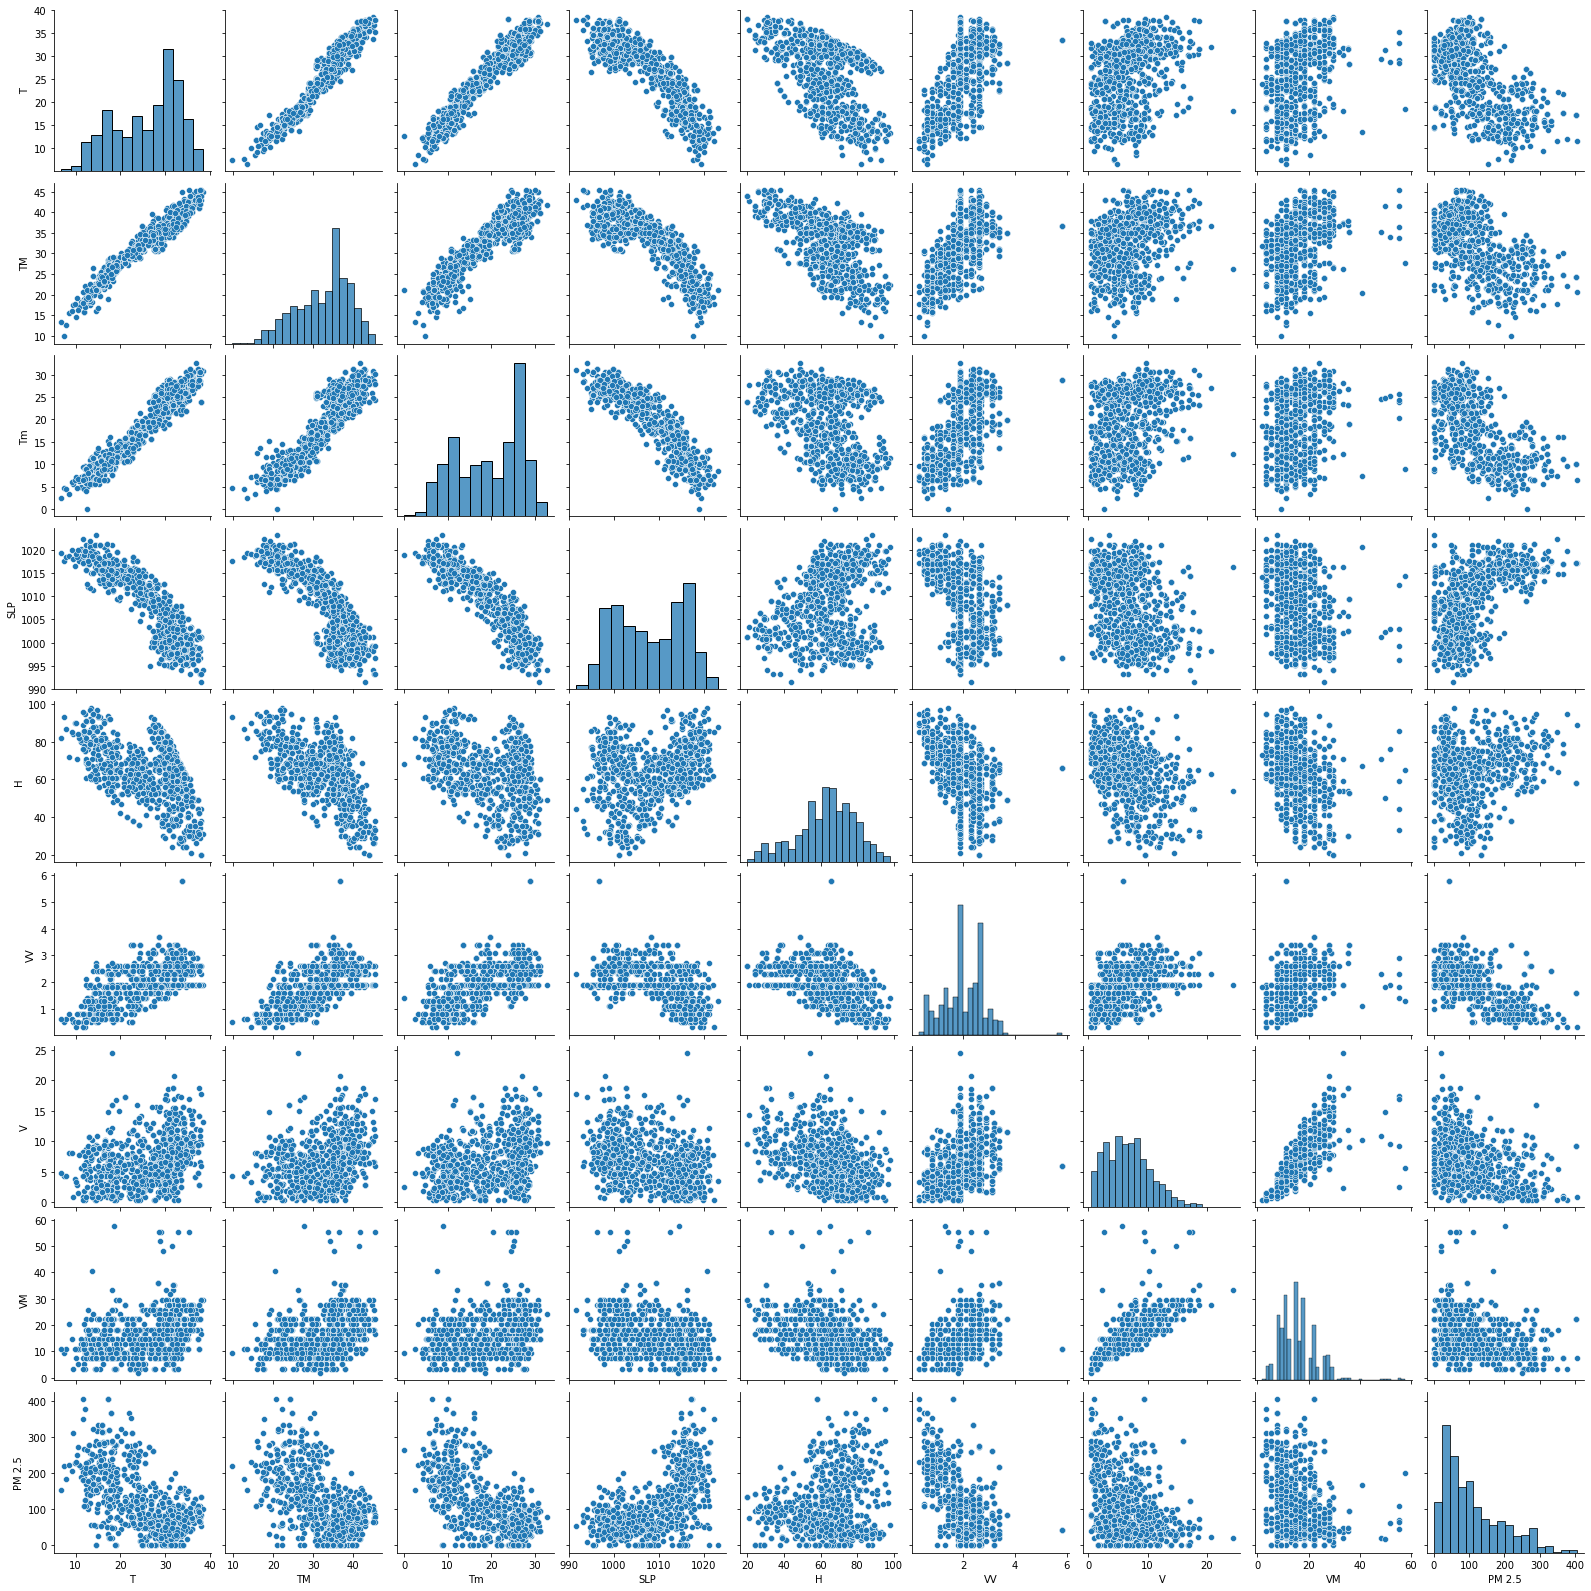

In [10]:
sns.pairplot(df)

In [11]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


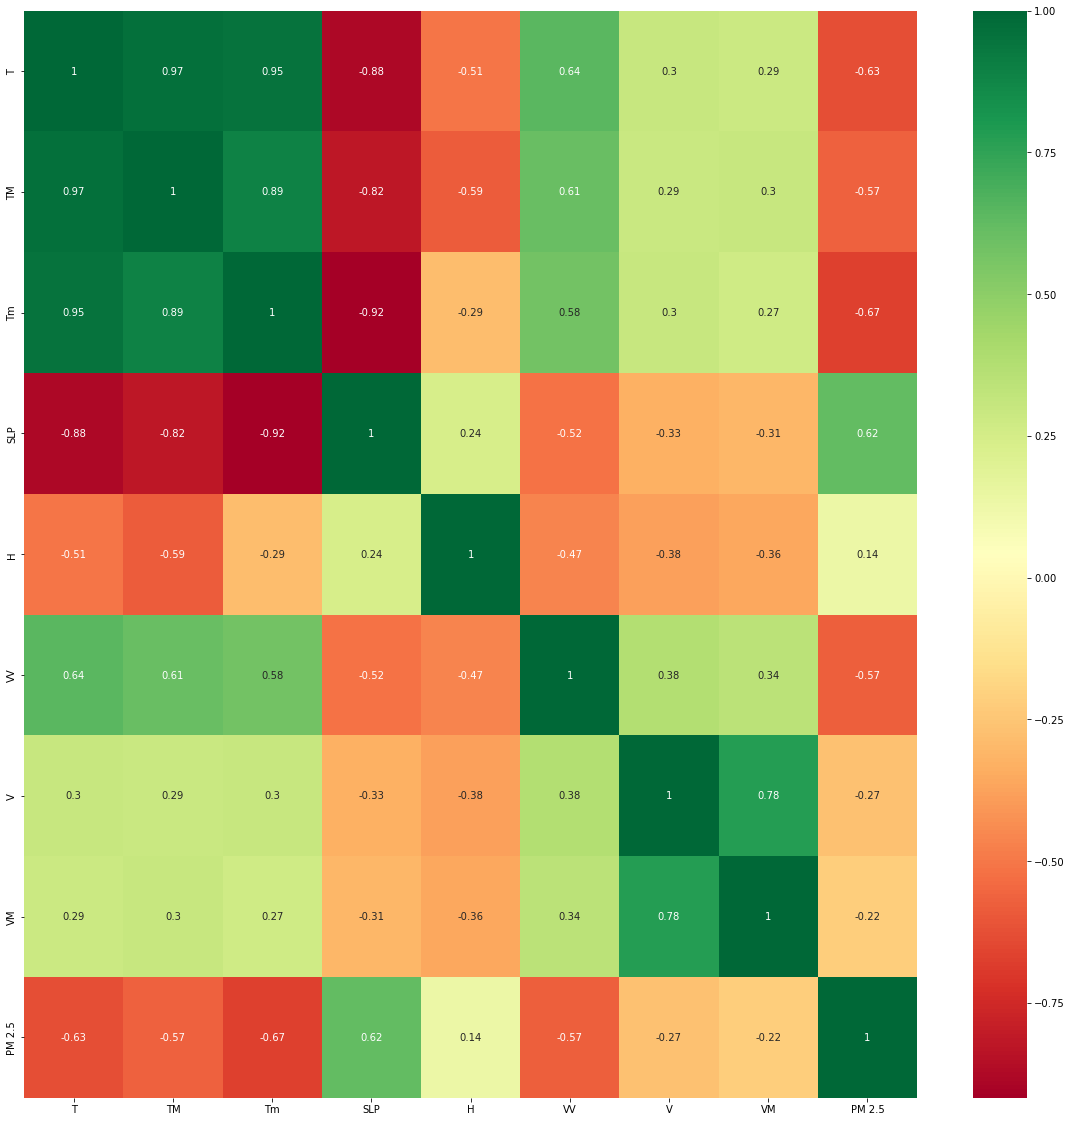

In [12]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [13]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [14]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [15]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


In [16]:
print(model.feature_importances_)

[0.19670398 0.11570222 0.19407408 0.12517038 0.08957327 0.18411586
 0.05174417 0.04291603]


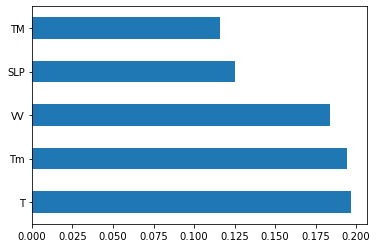

In [17]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Linear Regression

C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

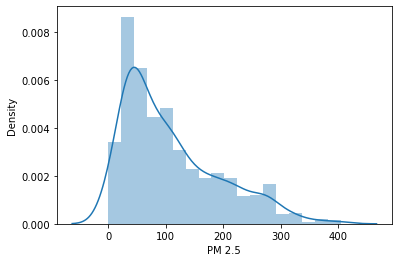

In [18]:
sns.distplot(y)

### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression

In [21]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
regressor.coef_

array([ -2.69090829,   0.46219975,  -3.86705184,  -0.04494855,
        -1.21193616, -40.11490762,  -2.53563257,   0.56148181])

In [23]:
regressor.intercept_

448.1161696758844

In [26]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.551516808175875


In [29]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.48525331308567876


In [30]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [31]:
score.mean()

0.47105693048073904

#### Model Evaluation

In [32]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,-2.690908
TM,0.462200
Tm,-3.867052
SLP,-0.044949
H,-1.211936
VV,-40.114908
V,-2.535633
VM,0.561482


In [33]:
pred_y_linear = regressor.predict(X_test)

C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

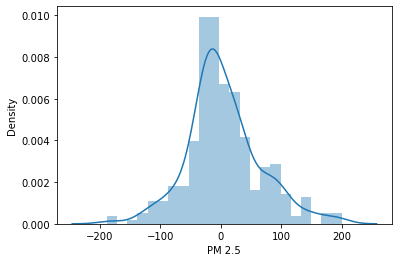

In [35]:
sns.distplot(y_test-pred_y_linear)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

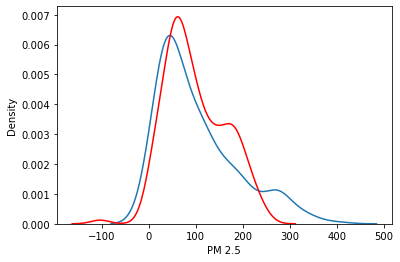

In [45]:
import matplotlib.pyplot as plt

#plt.plot(y)
sns.kdeplot(y_test)
sns.kdeplot(pred_y_linear, color = 'red')

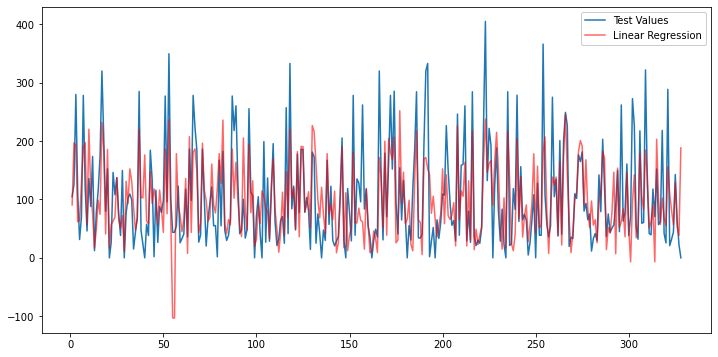

In [120]:
x = np.linspace(1, len(y_test),len(y_test))
plt.figure(figsize=(12,6))
plt.plot(x, y_test, label = "Test Values")
plt.plot(x, pred_y_linear, color = "red",alpha = 0.6, label = "Linear Regression")
plt.legend(framealpha=1, frameon=True)
plt.show()

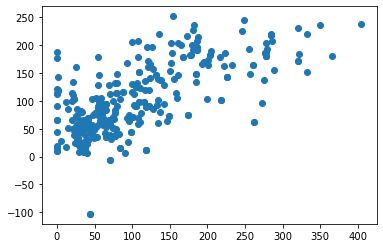

In [47]:
plt.scatter(y_test,pred_y_linear)


In [48]:
from sklearn import metrics

## RMSE

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test,pred_y_linear))
print('MSE:', metrics.mean_squared_error(y_test, pred_y_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y_linear)))

MAE: 44.836241266286386
MSE: 3687.5430309324192
RMSE: 60.725143317512384


### Ridge and Lasso Regression

In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [69]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [70]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-3664.3648996071706


In [71]:
pred_y_ridge = ridge_regressor.predict(X_test)

C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

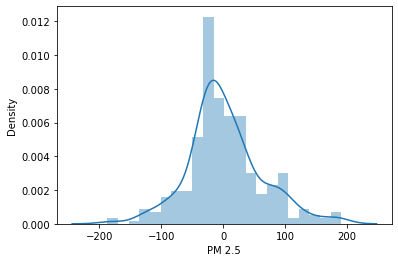

In [72]:
sns.distplot(y_test-pred_y_ridge)

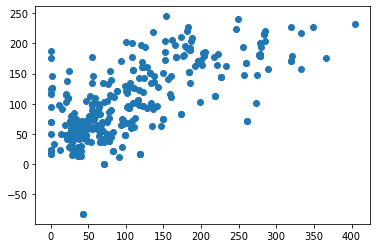

In [73]:
plt.scatter(y_test,pred_y_ridge)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

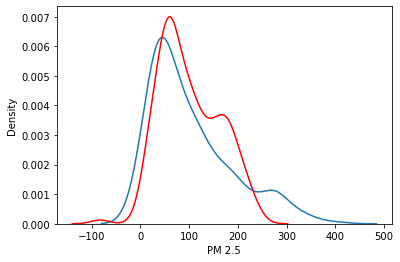

In [74]:
import matplotlib.pyplot as plt

#plt.plot(y)
sns.kdeplot(y_test)
sns.kdeplot(pred_y_ridge, color = 'red')

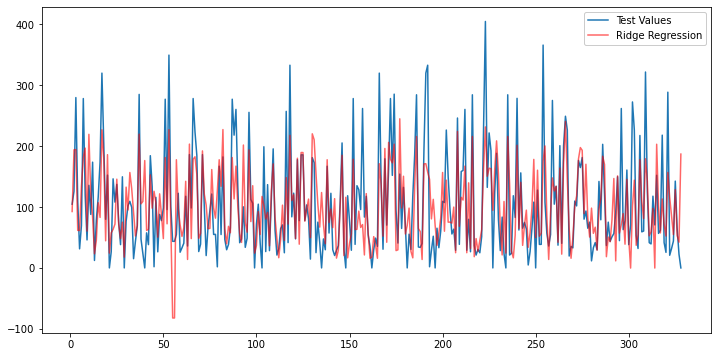

In [121]:
x = np.linspace(1, len(y_test),len(y_test))
plt.figure(figsize=(12,6))
plt.plot(x, y_test, label = "Test Values")
plt.plot(x, pred_y_ridge, color = "red",alpha = 0.6, label = "Ridge Regression")
plt.legend(framealpha=1, frameon=True)
plt.show()

### Lasso Regression

In [75]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [76]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\Khyati\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.444e+06, tolerance: 6.146e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Khyati\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.569e+06, tolerance: 6.790e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Khyati\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.456e+06, toler

{'alpha': 1}
-3666.78325343702


In [77]:
pred_y_lasso = lasso_regressor.predict(X_test)

C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

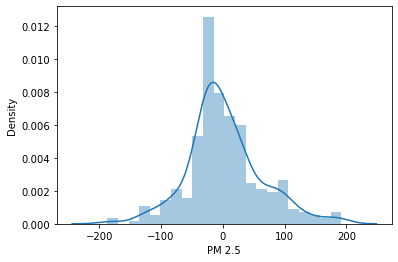

In [78]:
sns.distplot(y_test-pred_y_lasso)

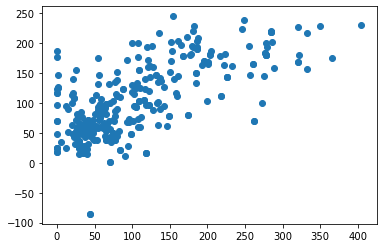

In [79]:
plt.scatter(y_test,pred_y_lasso)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

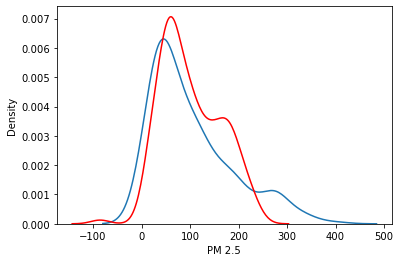

In [80]:
import matplotlib.pyplot as plt

#plt.plot(y)
sns.kdeplot(y_test)
sns.kdeplot(pred_y_lasso, color = 'red')

In [ ]:
x = np.linspace(1, len(y_test),len(y_test))
plt.figure(figsize=(12,6))
plt.plot(x, y_test, label = "Test Values")
plt.plot(x, pred_y_lasso, color = "red",alpha = 0.6, label = "Lasso Regression")
plt.legend(framealpha=1, frameon=True)
plt.show()

In [ ]:
from sklearn import metrics

## RMSE

In [81]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_y_lasso))
print('MSE:', metrics.mean_squared_error(y_test, pred_y_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y_lasso)))

MAE: 44.50831198875126
MSE: 3627.8109390424697
RMSE: 60.2313119485411


In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_y_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_y_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y_ridge)))

MAE: 44.637343359962244
MSE: 3627.094448927205
RMSE: 60.22536383391308


### Decision Tree Regressor Air Quality Index Prediction

In [83]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
dtree=DecisionTreeRegressor(criterion='friedman_mse')

In [87]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse')

In [88]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 1.0
Coefficient of determination R^2 <-- on test set: 0.7136824599204172


In [89]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [90]:
score.mean()

0.44875673863884336

In [91]:
##conda install pydotplus
## conda install python-graphviz

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [ ]:
features = list(df.columns[:-1])
features

In [ ]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [92]:

pred_y_DT = dtree.predict(X_test)

C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

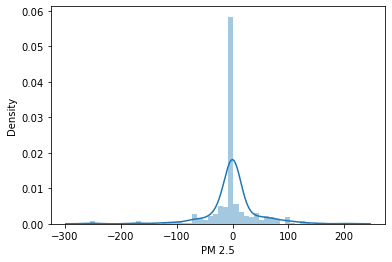

In [93]:
sns.distplot(y_test-pred_y_DT)

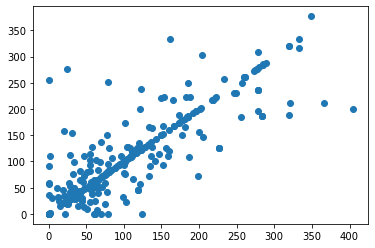

In [94]:
plt.scatter(y_test,pred_y_DT)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

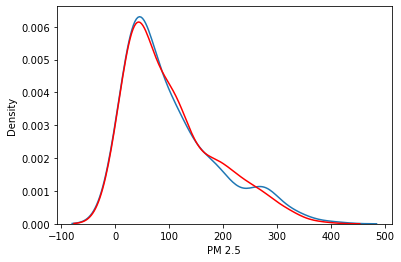

In [95]:
#import matplotlib.pyplot as plt

#plt.plot(y)
#sns.kdeplot(y_test)
#sns.kdeplot(pred_y_DT, color = 'red')

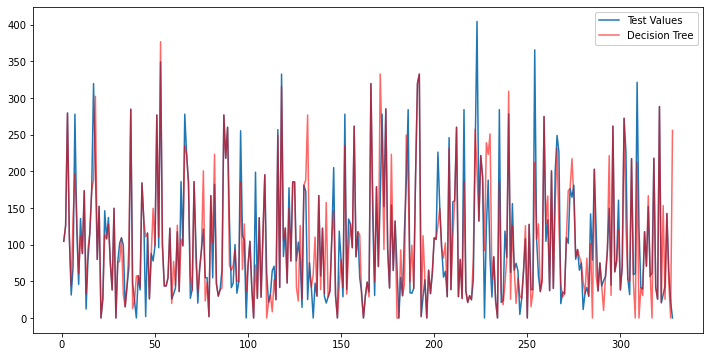

In [118]:
x = np.linspace(1, len(y_test),len(y_test))
plt.figure(figsize=(12,6))
plt.plot(x, y_test, label = "Test Values")
plt.plot(x, pred_y_DT, color = "red",alpha = 0.6, label = "Decision Tree")
plt.legend(framealpha=1, frameon=True)
plt.show()

## RMSE

In [124]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_y_DT))
print('MSE:', metrics.mean_squared_error(y_test, pred_y_DT))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y_DT)))

MAE: 22.91793699186992
MSE: 2051.1219914464773
RMSE: 45.289314318572735


### Hyperparameter Tuning DEcision Tree Regressor

In [96]:
DecisionTreeRegressor()


DecisionTreeRegressor()

In [97]:
## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [98]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [99]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)


In [100]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


In [101]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits

 Time taken: 0 hours 0 minutes and 39.54 seconds.


C:\Users\Khyati\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25600 fits failed out of a total of 102400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14418 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Khyati\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Khyati\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Khyati\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Khyati\anaconda3\lib

In [102]:
random_search.best_params_

{'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 50,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [103]:
random_search.best_score_

-3131.6489619178874

In [107]:
pred_y_DT_tuned=random_search.predict(X_test)

C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

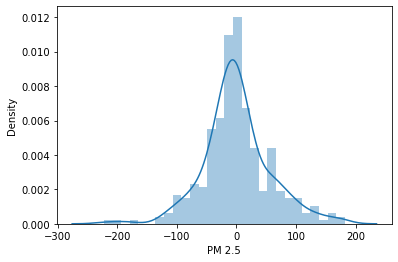

In [108]:
sns.distplot(y_test-pred_y_DT_tuned)

## RMSE

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_y_DT_tuned))
print('MSE:', metrics.mean_squared_error(y_test, pred_y_DT_tuned))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y_DT_tuned)))

MAE: 40.14163092473942
MSE: 3171.808145980199
RMSE: 56.318808101558744


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

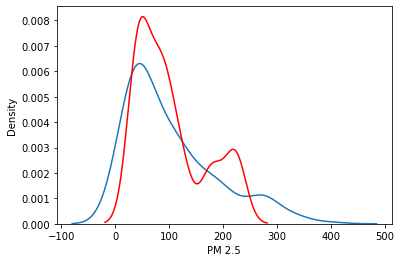

In [110]:
import matplotlib.pyplot as plt

#plt.plot(y)
sns.kdeplot(y_test)
sns.kdeplot(pred_y_DT_tuned, color = 'red')

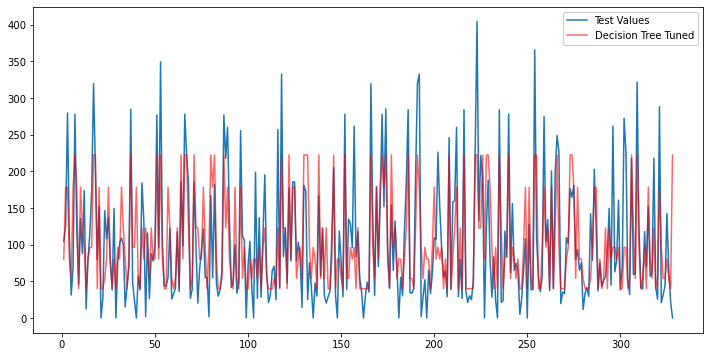

In [122]:
x = np.linspace(1, len(y_test),len(y_test))
plt.figure(figsize=(12,6))
plt.plot(x, y_test, label = "Test Values")
plt.plot(x, pred_y_DT_tuned, color = "red",alpha = 0.6, label = "Decision Tree Tuned")
plt.legend(framealpha=1, frameon=True)
plt.show()

## KNNRegressor(K Nearest Neighbor Regression)


In [125]:
from sklearn.neighbors import KNeighborsRegressor

In [126]:
regressor=KNeighborsRegressor(n_neighbors=1)
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [127]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 1.0
Coefficient of determination R^2 <-- on train set: 0.5417545333477789


In [128]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [129]:
score.mean()

0.39387489016756577

In [130]:
pred_y_KNN = regressor.predict(X_test)

C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

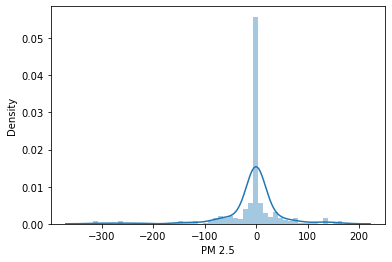

In [131]:
sns.distplot(y_test-pred_y_KNN)

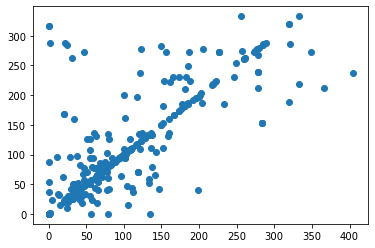

In [132]:
plt.scatter(y_test,pred_y_KNN)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

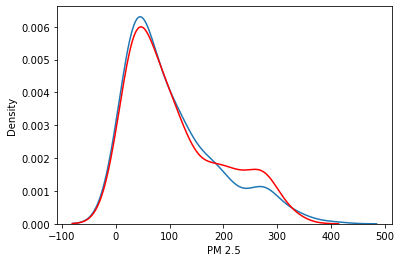

In [202]:
import matplotlib.pyplot as plt

#plt.plot(y)
sns.kdeplot(y_test)
sns.kdeplot(pred_y_KNN, color = 'red')

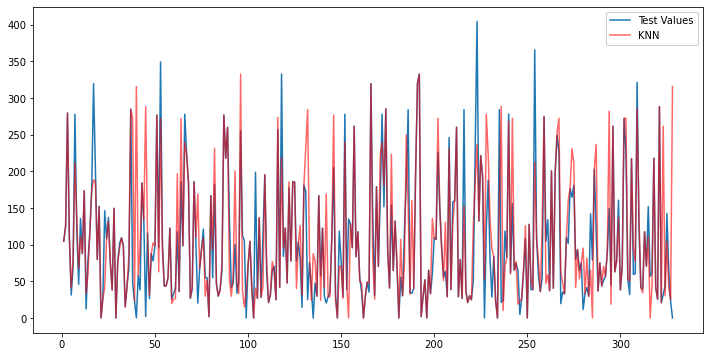

In [203]:
x = np.linspace(1, len(y_test),len(y_test))
plt.figure(figsize=(12,6))
plt.plot(x, y_test, label = "Test Values")
plt.plot(x, pred_y_KNN, color = "red",alpha = 0.6, label = "KNN")
plt.legend(framealpha=1, frameon=True)
plt.show()

## RMSE

In [133]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_y_KNN))
print('MSE:', metrics.mean_squared_error(y_test, pred_y_KNN))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y_KNN)))

MAE: 26.46491361788618
MSE: 3282.779510713076
RMSE: 57.295545295538254


### Hyperparameter Tuning

In [134]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

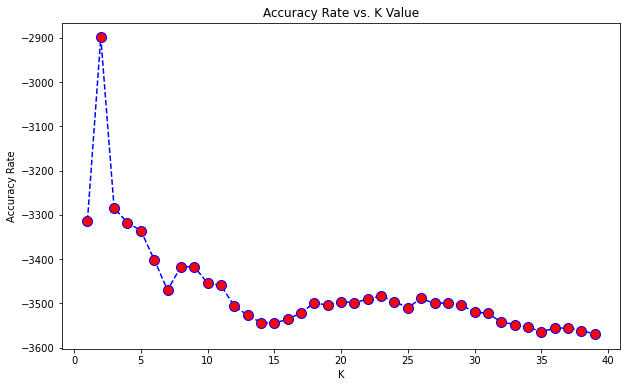

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [204]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train,y_train)
pred_y_KNN_1 = knn.predict(X_test)

C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

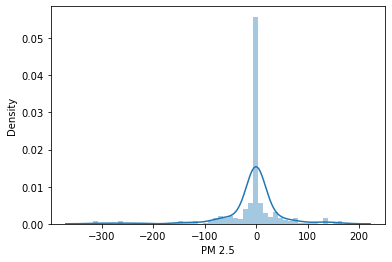

In [205]:
sns.distplot(y_test-pred_y_KNN_tuned)

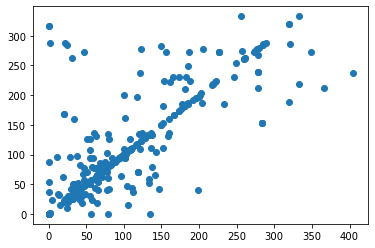

In [206]:
plt.scatter(y_test,pred_y_KNN_1)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

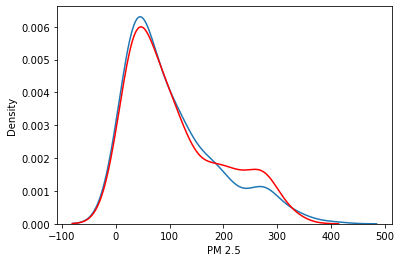

In [208]:
import matplotlib.pyplot as plt

#plt.plot(y)
sns.kdeplot(y_test)
sns.kdeplot(pred_y_KNN_1, color = 'red')

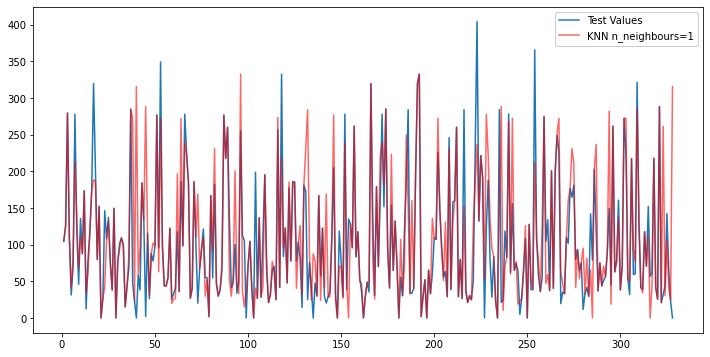

In [209]:
x = np.linspace(1, len(y_test),len(y_test))
plt.figure(figsize=(12,6))
plt.plot(x, y_test, label = "Test Values")
plt.plot(x, pred_y_KNN_1, color = "red",alpha = 0.6, label = "KNN n_neighbours=1")
plt.legend(framealpha=1, frameon=True)
plt.show()

In [207]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_y_KNN_1))
print('MSE:', metrics.mean_squared_error(y_test,pred_y_KNN_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y_KNN_1)))

MAE: 26.46491361788618
MSE: 3282.779510713076
RMSE: 57.295545295538254


In [144]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train,y_train)
pred_y_KNN_2 = knn.predict(X_test)

C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

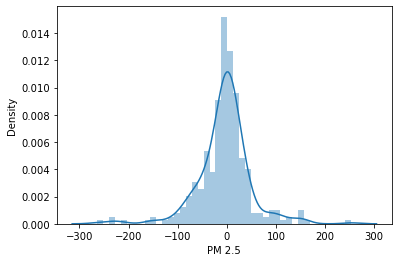

In [147]:
sns.distplot(y_test-pred_y_KNN_2)

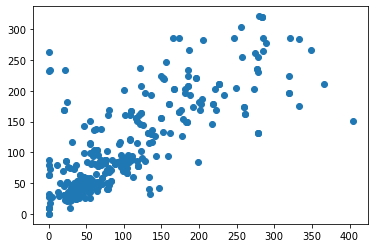

In [148]:
plt.scatter(y_test,pred_y_KNN_2)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

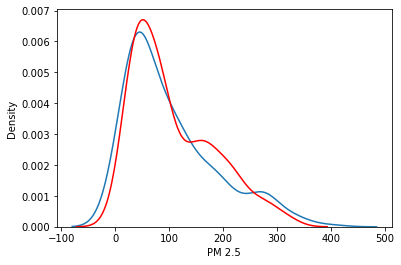

In [210]:
import matplotlib.pyplot as plt

#plt.plot(y)
sns.kdeplot(y_test)
sns.kdeplot(pred_y_KNN_2, color = 'red')

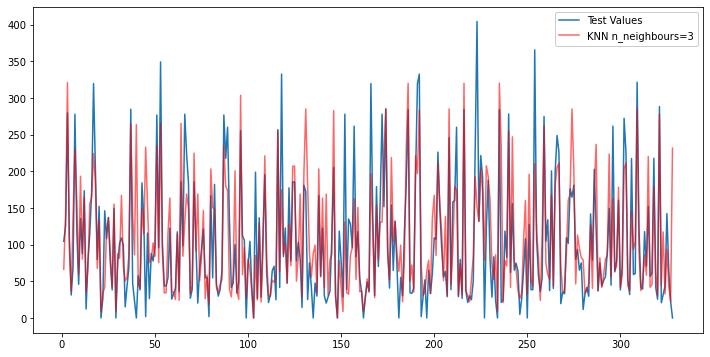

In [211]:

x = np.linspace(1, len(y_test),len(y_test))
plt.figure(figsize=(12,6))
plt.plot(x, y_test, label = "Test Values")
plt.plot(x, pred_y_KNN_2, color = "red",alpha = 0.6, label = "KNN n_neighbours=3")
plt.legend(framealpha=1, frameon=True)
plt.show()

In [149]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_y_KNN_2))
print('MSE:', metrics.mean_squared_error(y_test, pred_y_KNN_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y_KNN_2)))

MAE: 34.972675304878045
MSE: 2970.1032238207154
RMSE: 54.4986534129121


## Random Forest

In [152]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [154]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9751014071828196
Coefficient of determination R^2 <-- on train set: 0.7900596847976327


In [155]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [156]:
score.mean()

0.7268174307648683

In [157]:
pred_y_RF = regressor.predict(X_test)

C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

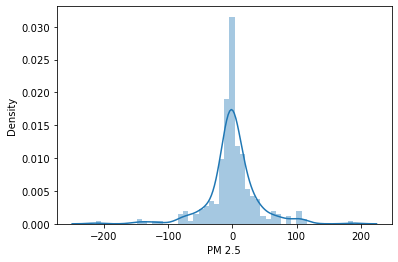

In [158]:
sns.distplot(y_test-pred_y_RF)

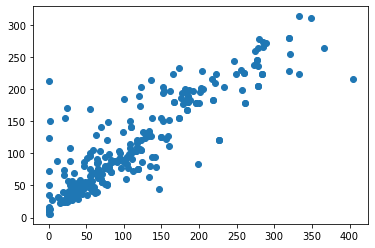

In [159]:
plt.scatter(y_test,pred_y_RF)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

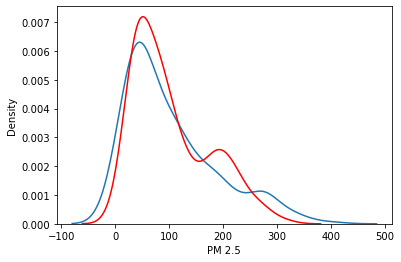

In [219]:
import matplotlib.pyplot as plt

#plt.plot(y)
sns.kdeplot(y_test)
sns.kdeplot(pred_y_RF, color = 'red')


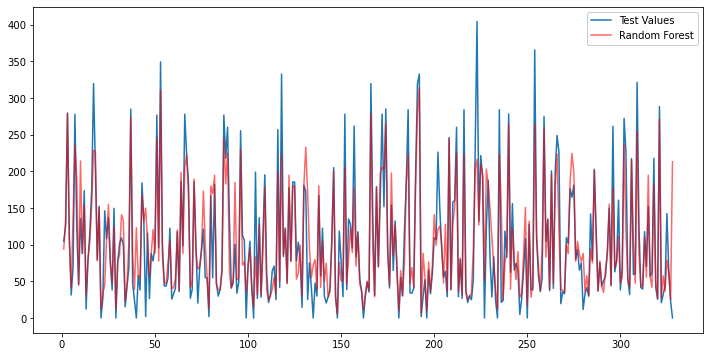

In [220]:

x = np.linspace(1, len(y_test),len(y_test))
plt.figure(figsize=(12,6))
plt.plot(x, y_test, label = "Test Values")
plt.plot(x, pred_y_RF, color = "red",alpha = 0.6, label = "Random Forest")
plt.legend(framealpha=1, frameon=True)
plt.show()

In [160]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_y_RF))
print('MSE:', metrics.mean_squared_error(y_test, pred_y_RF))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y_RF)))

MAE: 23.606688262195128
MSE: 1503.9707217486243
RMSE: 38.781061379862


## Hyperparameter Tuning

In [161]:
RandomForestRegressor()

RandomForestRegressor()

In [162]:
from sklearn.model_selection import RandomizedSearchCV

In [163]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [164]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [165]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [166]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [171]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5)

In [172]:
rf_random.fit(X_train,y_train)

C:\Users\Khyati\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
230 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Khyati\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Khyati\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Khyati\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Khyati\anaconda3\lib\site-p

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error')

In [173]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [174]:
rf_random.best_score_

-1540.3302797843603

In [175]:
pred_y_RF_tuned = rf_random.predict(X_test)

C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

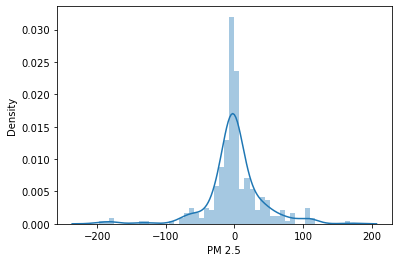

In [176]:
sns.distplot(y_test-pred_y_RF_tuned)

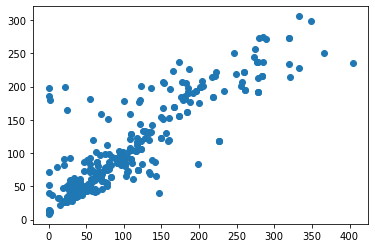

In [177]:
plt.scatter(y_test,pred_y_RF_tuned)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

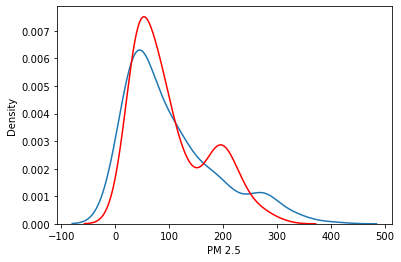

In [217]:
import matplotlib.pyplot as plt

#plt.plot(y)
sns.kdeplot(y_test)
sns.kdeplot(pred_y_RF_tuned, color = 'red')

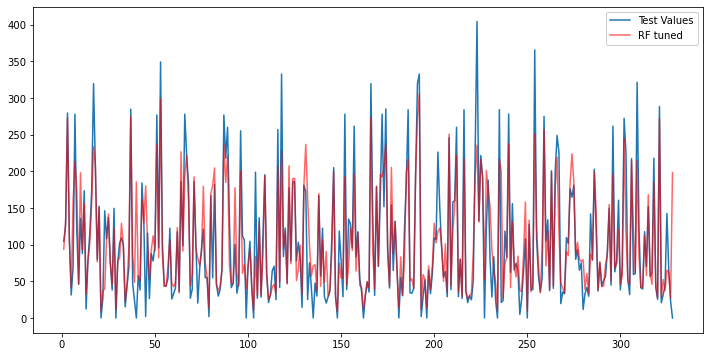

In [218]:
x = np.linspace(1, len(y_test),len(y_test))
plt.figure(figsize=(12,6))
plt.plot(x, y_test, label = "Test Values")
plt.plot(x, pred_y_RF_tuned, color = "red",alpha = 0.6, label = "RF tuned")
plt.legend(framealpha=1, frameon=True)
plt.show()

In [178]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_y_RF_tuned))
print('MSE:', metrics.mean_squared_error(y_test, pred_y_RF_tuned))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y_RF_tuned)))

MAE: 24.518446516703108
MSE: 1671.5091887992228
RMSE: 40.884094569884056


## XGBoost

In [179]:
import xgboost as xgb
#conda install -c ananconda py-xgboost

In [180]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [181]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9997717196345083
Coefficient of determination R^2 <-- on train set: 0.8123312908288712


In [182]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [183]:
score.mean()

0.7251276747945072

In [184]:
pred_y_XG = regressor.predict(X_test)

C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

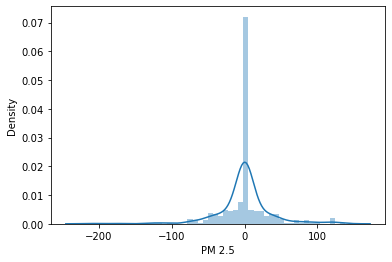

In [185]:
sns.distplot(y_test-pred_y_XG)

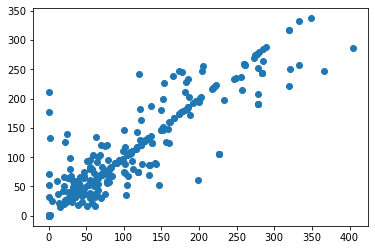

In [186]:
plt.scatter(y_test,pred_y_XG)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

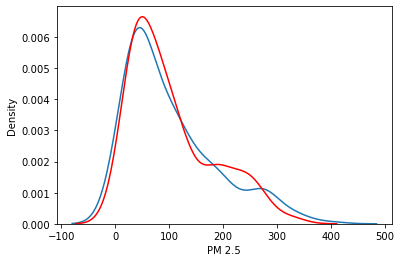

In [214]:
import matplotlib.pyplot as plt

#plt.plot(y)
sns.kdeplot(y_test)
sns.kdeplot(pred_y_XG, color = 'red')

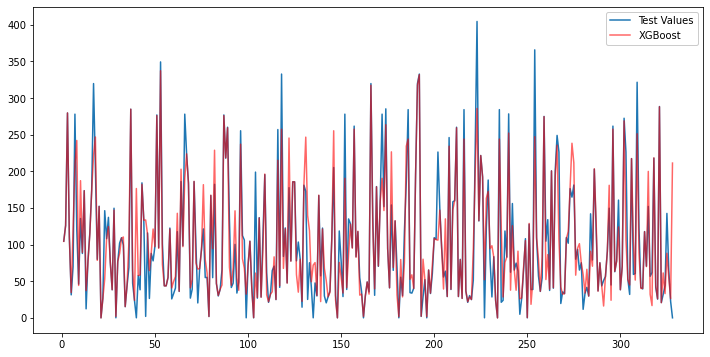

In [215]:
x = np.linspace(1, len(y_test),len(y_test))
plt.figure(figsize=(12,6))
plt.plot(x, y_test, label = "Test Values")
plt.plot(x, pred_y_XG, color = "red",alpha = 0.6, label = "XGBoost")
plt.legend(framealpha=1, frameon=True)
plt.show()

## Hyperparameter Tuning

In [187]:
xgb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [188]:
from sklearn.model_selection import RandomizedSearchCV

In [189]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [190]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [191]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [192]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor()

In [193]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [194]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.5s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.5s
[CV] END learning_ra

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=1,
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_child_weight': [3, 4, 5, 6, 7],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200],
                                        'subsample': [0.7, 0.6, 0.8]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [195]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 3,
 'max_depth': 30,
 'learning_rate': '0.05'}

In [196]:
xg_random.best_score_

-1380.6366880668838

In [197]:
pred_y_XG_tuned = xg_random.predict(X_test)

C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

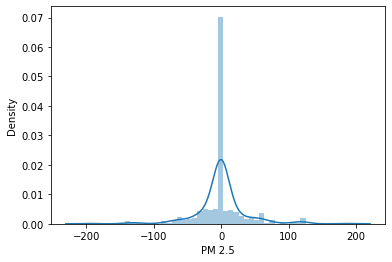

In [198]:
sns.distplot(y_test-pred_y_XG_tuned)

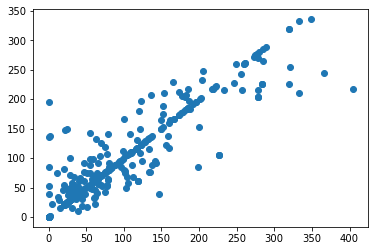

In [200]:
plt.scatter(y_test,pred_y_XG_tuned)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

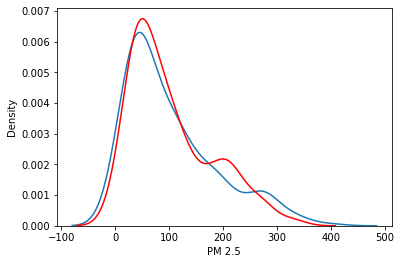

In [212]:
import matplotlib.pyplot as plt

#plt.plot(y)
sns.kdeplot(y_test)
sns.kdeplot(pred_y_XG_tuned, color = 'red')


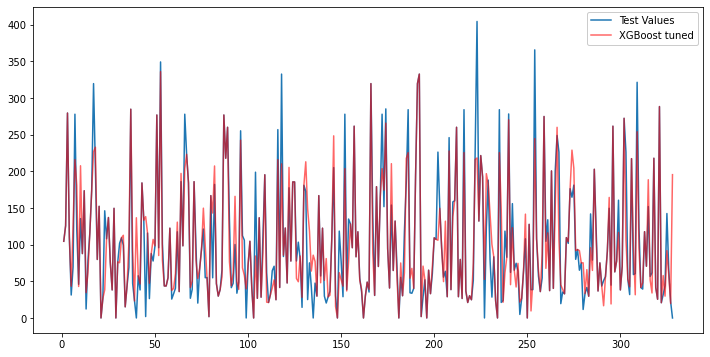

In [213]:

x = np.linspace(1, len(y_test),len(y_test))
plt.figure(figsize=(12,6))
plt.plot(x, y_test, label = "Test Values")
plt.plot(x, pred_y_XG_tuned, color = "red",alpha = 0.6, label = "XGBoost tuned")
plt.legend(framealpha=1, frameon=True)
plt.show()

In [201]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_y_XG_tuned))
print('MSE:', metrics.mean_squared_error(y_test, pred_y_XG_tuned))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_y_XG_tuned)))

MAE: 19.02743722623126
MSE: 1355.7081047805843
RMSE: 36.81994167269395


### ANN

In [51]:
!pip install tensorflow

  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.33.0
    Uninstalling google-auth-1.33.0:
      Successfully uninstalled google-auth-1.33.0
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.1
    Uninstalling protobuf-3.19.1:
      Successfully uninstalled protobuf-3.19.1
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.7.1
    Uninstalling typing-extensions-4.7.1:
      Successfully uninstalled typing-extensions-4.7.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.22.0 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.22.0 which is incompatible.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.22.0 which is incompatible.


In [52]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [58]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1152      
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 166017 (648.50 KB)
Trainable params: 166017 (648.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
52

In [59]:
pred_y_ANN = NN_model.predict(X_test)

11/11 [==============================] - 0s 2ms/step


C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

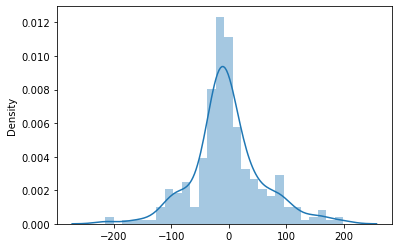

In [60]:
sns.distplot(y_test.values.reshape(-1,1)-pred_y_ANN)

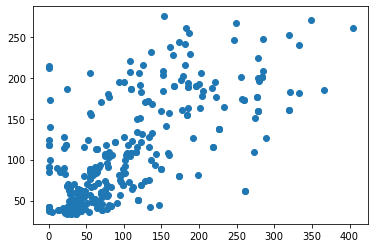

In [62]:
plt.scatter(y_test,pred_y_ANN)

C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khyati\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

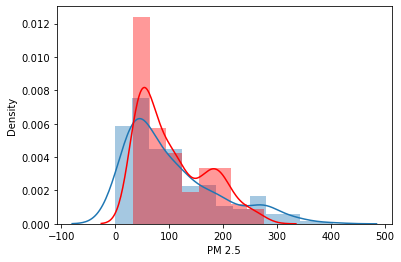

In [67]:
import matplotlib.pyplot as plt

sns.distplot(y_test)
sns.distplot(pred_y_ANN, color = "red")
#sns.kdeplot(y_test)
#sns.kdeplot(pred_y_ANN, color = 'red')

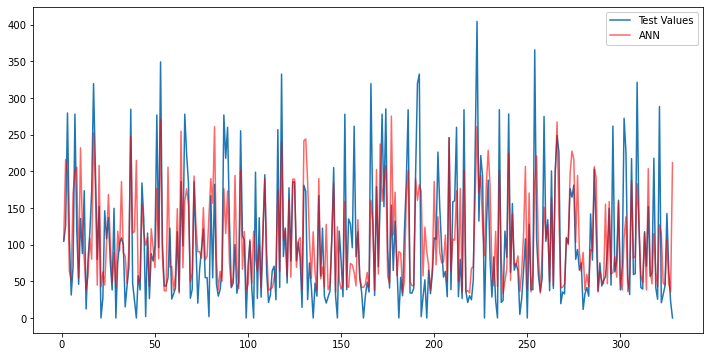

In [123]:
x = np.linspace(1, len(y_test),len(y_test))
plt.figure(figsize=(12,6))
plt.plot(x, y_test, label = "Test Values")
plt.plot(x, pred_y_ANN, color = "red",alpha = 0.6, label = "ANN")
plt.legend(framealpha=1, frameon=True)
plt.show()